In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from datetime import datetime
import xgboost as xgb
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.linear_model import Lasso,Ridge,LinearRegression,ElasticNet
from sklearn.decomposition import PCA
from tensorflow import keras

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [804]:
df=pd.read_csv("C:/Users/User/Desktop/Comp/Train.csv")
test=pd.read_csv("C:/Users/User/Desktop/Comp/Test.csv")

In [805]:
df["traffic_volume"]=df["traffic_volume"].apply(lambda x : x+1)

In [806]:
df.shape

(33750, 15)

In [807]:
test.shape

(14454, 14)

In [808]:
df.isnull().sum()

date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
traffic_volume         0
dtype: int64

In [809]:
test.isnull().sum()

date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
dtype: int64

In [810]:
df.dtypes

date_time               object
is_holiday              object
air_pollution_index      int64
humidity                 int64
wind_speed               int64
wind_direction           int64
visibility_in_miles      int64
dew_point                int64
temperature            float64
rain_p_h               float64
snow_p_h               float64
clouds_all               int64
weather_type            object
weather_description     object
traffic_volume           int64
dtype: object

In [811]:
df.head(10)

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5546
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4517
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4768
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5027
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4919
5,2012-10-02 14:00:00,None,23,65,3,328,6,6,291.72,0.0,0.0,1,Clear,sky is clear,5182
6,2012-10-02 15:00:00,None,184,64,3,328,7,7,293.17,0.0,0.0,1,Clear,sky is clear,5585
7,2012-10-02 16:00:00,None,167,64,3,327,7,7,293.86,0.0,0.0,1,Clear,sky is clear,6016
8,2012-10-02 17:00:00,None,119,63,3,327,6,6,294.14,0.0,0.0,20,Clouds,few clouds,5792
9,2012-10-02 18:00:00,None,161,63,3,326,3,3,293.10,0.0,0.0,20,Clouds,few clouds,4771


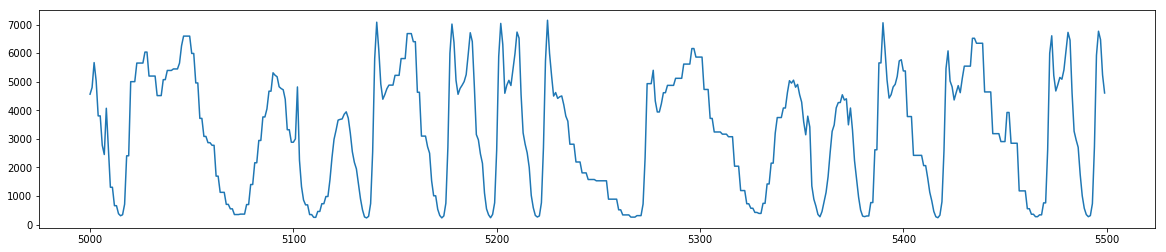

In [874]:
plt.figure(figsize=(20,4))
#plt.plot(df["traffic_volume"])
s=pd.Series(df["traffic_volume"].iloc[5000:5500])
s.plot()

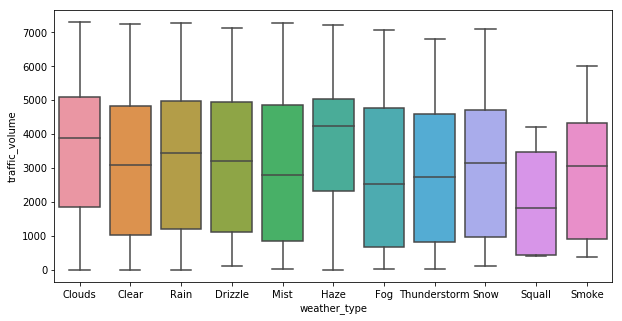

In [813]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x="weather_type",y="traffic_volume")
#weather_type	weather_description	traffic_volume

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

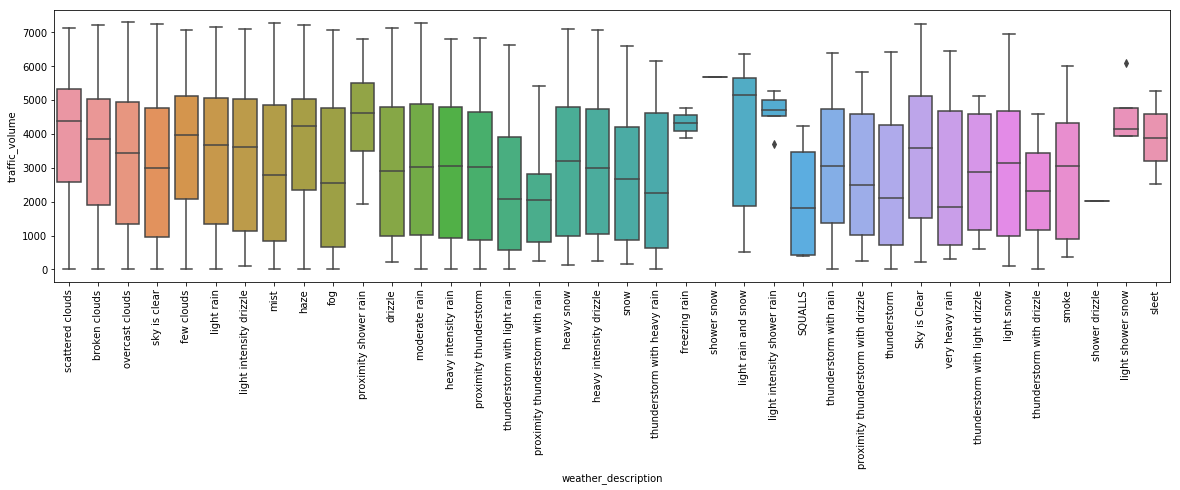

In [814]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df,x="weather_description",y="traffic_volume")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

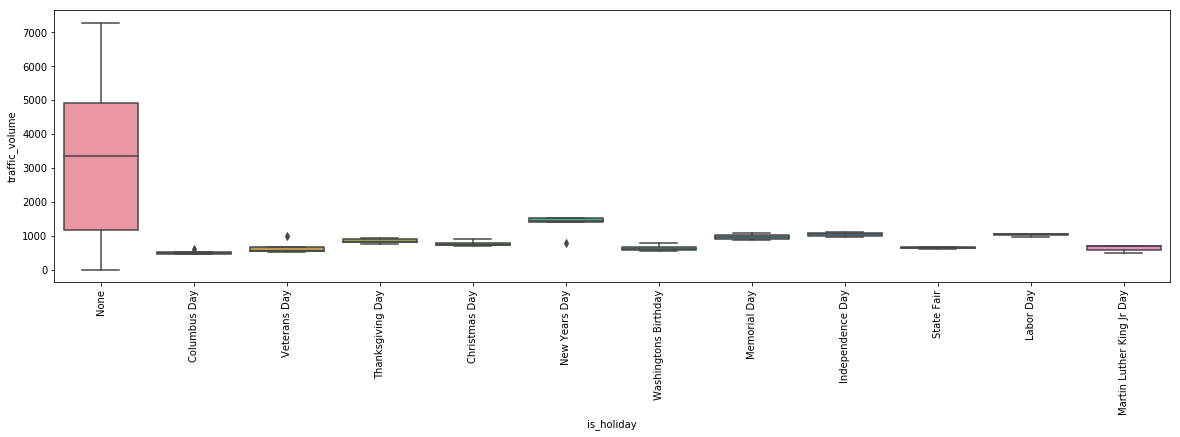

In [815]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df,x="is_holiday",y="traffic_volume")
plt.xticks(rotation=90)

In [816]:
df["date_time"]=df["date_time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
test["date_time"]=test["date_time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [817]:
df["year"]=df["date_time"].apply(lambda x : x.year)
df["month"]=df["date_time"].apply(lambda x : x.month)
df["day"]=df["date_time"].apply(lambda x : x.day)
test["year"]=test["date_time"].apply(lambda x : x.year)
test["month"]=test["date_time"].apply(lambda x : x.month)
test["day"]=test["date_time"].apply(lambda x : x.day)

In [818]:
df["hour"]=df["date_time"].apply(lambda x : x.hour)
test["hour"]=test["date_time"].apply(lambda x : x.hour)

In [819]:
df["weekday"]=df["date_time"].apply(lambda x : x.weekday())
test["weekday"]=test["date_time"].apply(lambda x : x.weekday())

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

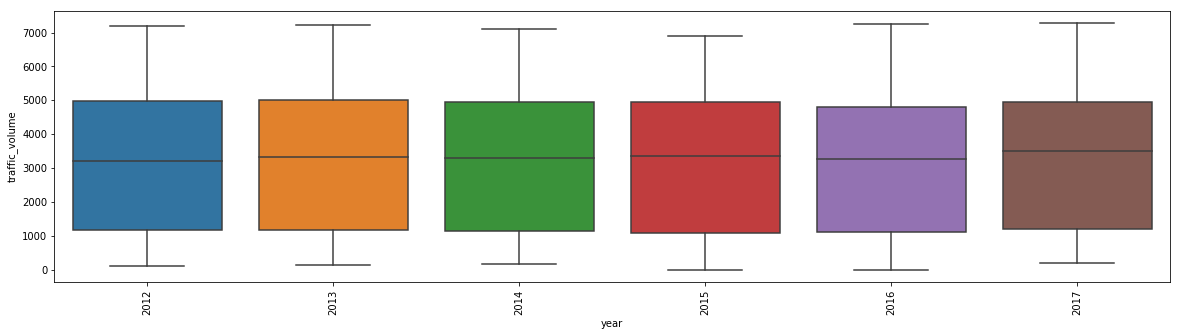

In [820]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df,x="year",y="traffic_volume")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

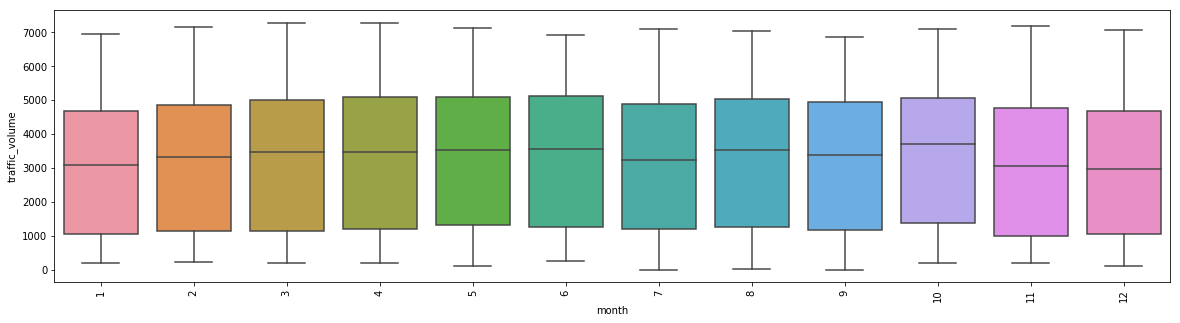

In [821]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df,x="month",y="traffic_volume")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

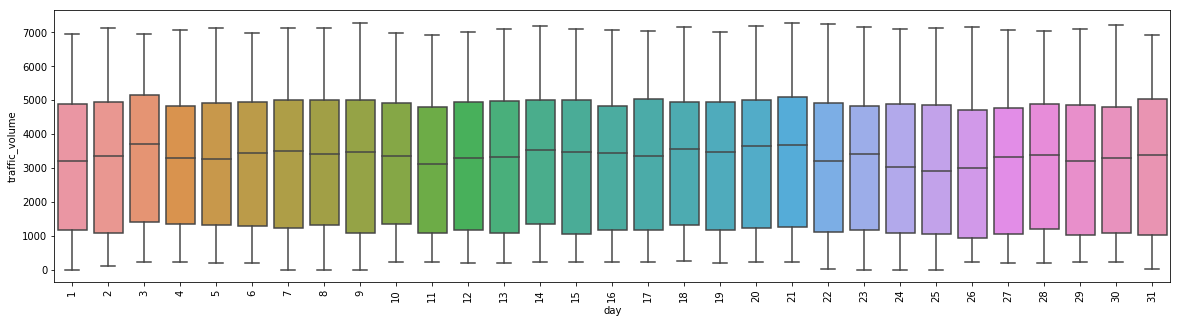

In [822]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df,x="day",y="traffic_volume")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

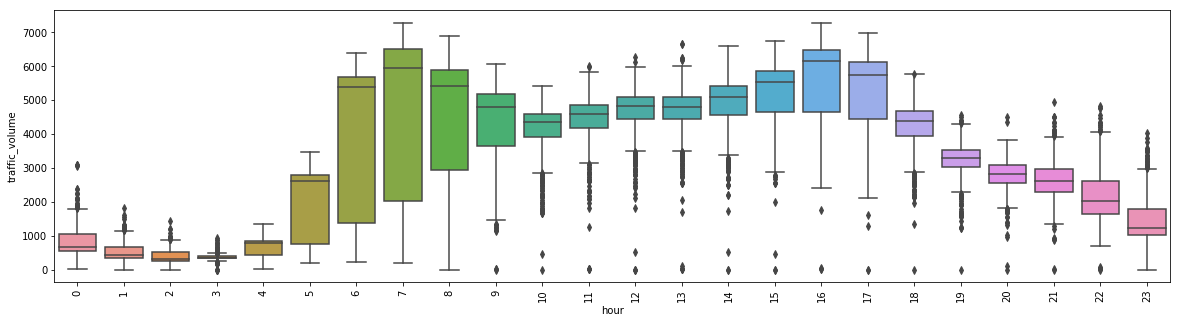

In [823]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df,x="hour",y="traffic_volume")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

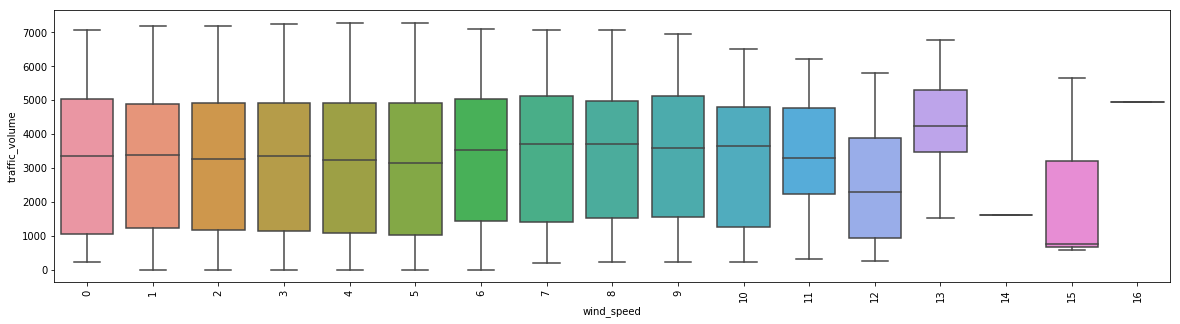

In [824]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df,x="wind_speed",y="traffic_volume")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

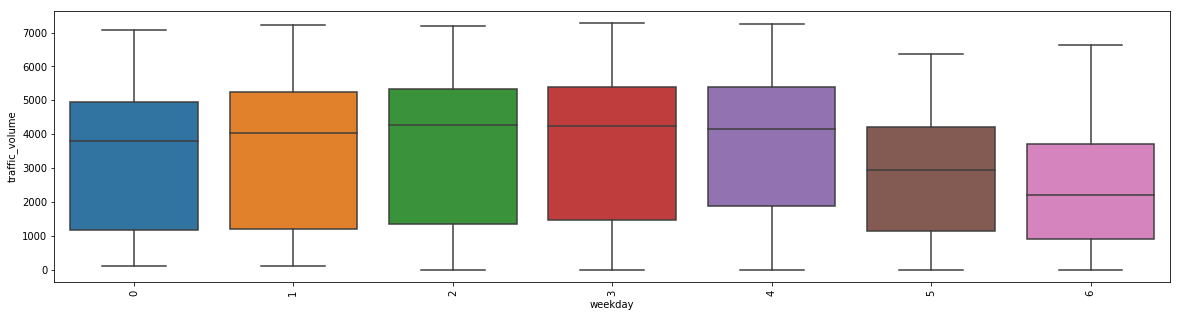

In [825]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df,x="weekday",y="traffic_volume")
plt.xticks(rotation=90)

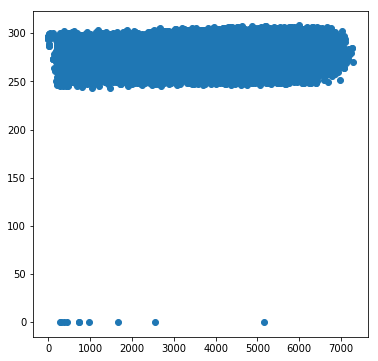

In [826]:
plt.figure(figsize=(6,6))
plt.scatter(df["traffic_volume"],df["temperature"])

In [827]:
low_idx=df["temperature"][df["temperature"] == 0].index

In [828]:
corr=df.corr()

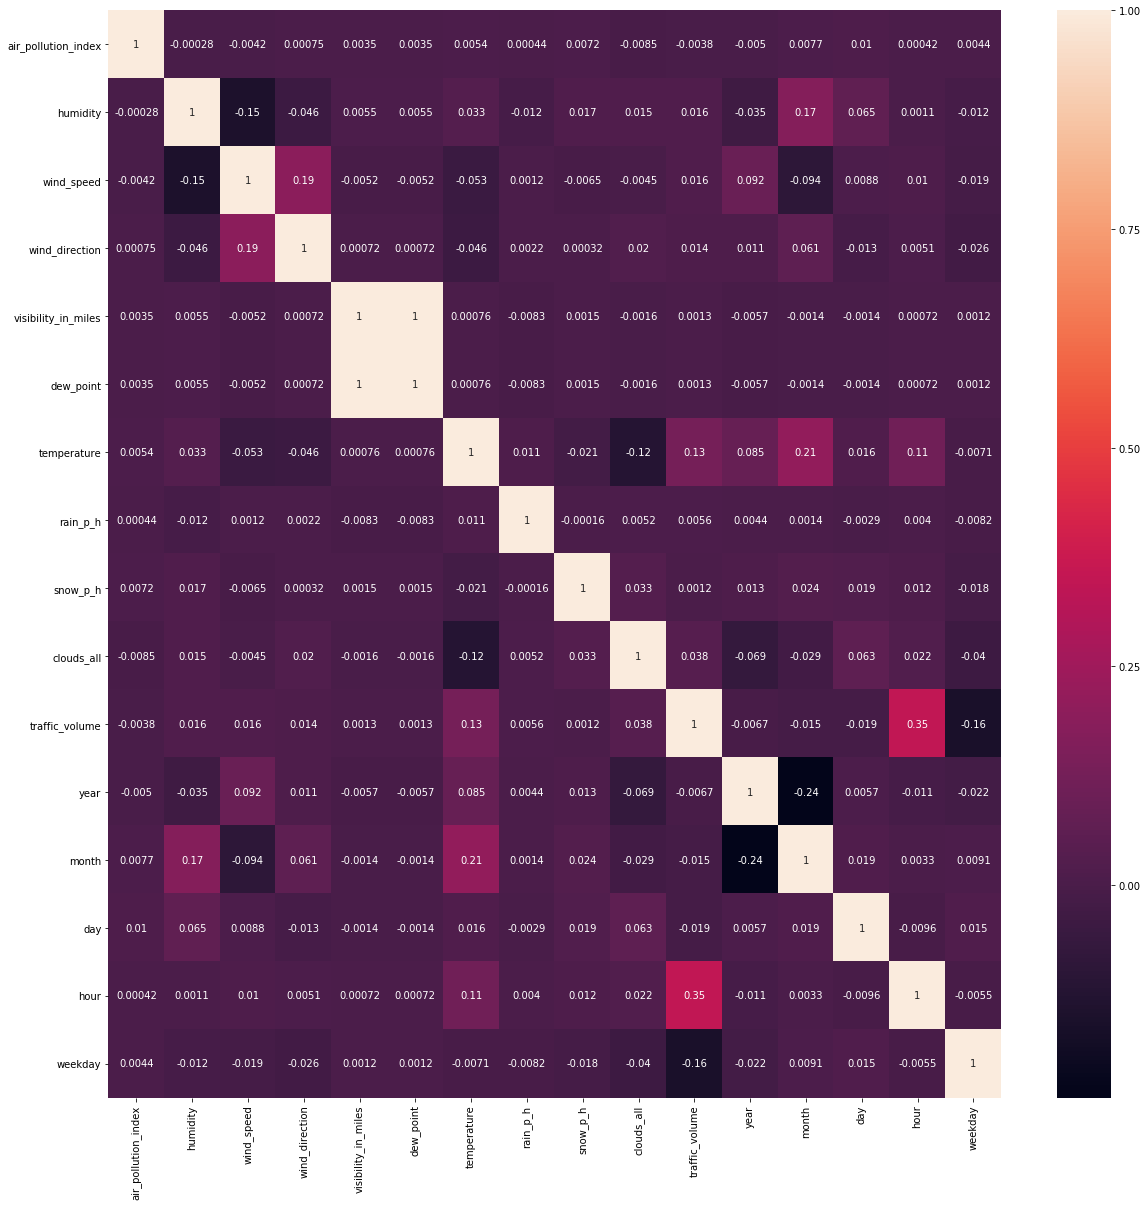

In [829]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

In [830]:
weekday_dict={0:"weekend",1:"weekday",2:"weekday",3:"weekday",4:"weekday",5:"weekday",6:"weekend"}
df["is_weekday"]=df["weekday"].apply(lambda x : weekday_dict[x])
test["is_weekday"]=test["weekday"].apply(lambda x : weekday_dict[x])

day_dict={0:"sunday",1:"monday",2:"tuesday",3:"wednesday",4:"thursday",5:"friday",6:"saturday"}
df["weekday"]=df["weekday"].apply(lambda x : day_dict[x])
test["weekday"]=test["weekday"].apply(lambda x : day_dict[x])

In [831]:
for i in ["is_holiday","weather_type","weather_description","weekday","month","is_weekday"]:
    encoder=LabelEncoder().fit(df[i])
    df[i]=encoder.transform(df[i])
    test[i]=encoder.transform(test[i])

In [832]:
data=pd.concat([df.drop(columns="traffic_volume"),test])

In [833]:
data.shape

(48204, 20)

In [834]:
data=data.reset_index().drop(columns="index")

In [835]:
dict_day={0:"sunday",1:"monday",2:"tuesday",3:"wednesday",4:"thursday",5:"friday",6:"saturday"}
data["weekday"]=data["weekday"].apply(lambda x : dict_day[x])

In [836]:
for i in ["is_holiday","weather_type","weather_description","month","is_weekday"]:
    data[i]=data[i].apply( lambda x : str(x) + i)

In [837]:
for i in ["is_holiday","weather_type","weekday","month","is_weekday"]:
    data=data.merge(pd.get_dummies(data[i]),on=data.index)
    data.drop(columns=i,inplace=True)
    data.drop(columns="key_0",inplace=True)

In [838]:
data.shape

(48204, 59)

In [839]:
data.head()

,date_time,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,...,2month,3month,4month,5month,6month,7month,8month,9month,0,1
0,2012-10-02 09:00:00,121,89,2,329,1,1,288.28,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
1,2012-10-02 10:00:00,178,67,3,330,1,1,289.36,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,2012-10-02 11:00:00,113,66,3,329,2,2,289.58,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3,2012-10-02 12:00:00,20,66,3,329,5,5,290.13,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
4,2012-10-02 13:00:00,281,65,3,329,7,7,291.14,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0


In [840]:
high_idx_rain=np.argmax(df["rain_p_h"])

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [841]:
df["wind_speed"].unique()

array([ 2,  3,  4,  5,  7,  6,  0,  1,  9,  8, 10, 12, 11, 13, 15, 14, 16],
      dtype=int64)

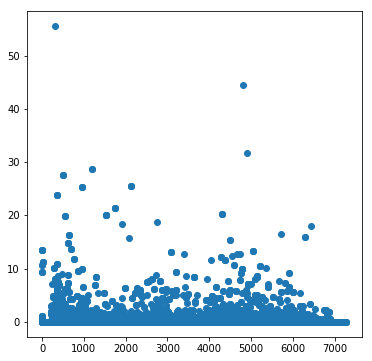

In [842]:
plt.figure(figsize=(6,6))
plt.scatter(df.drop(high_idx_rain)["traffic_volume"],df.drop(high_idx_rain)["rain_p_h"])

In [846]:
test_idx=test["date_time"]
test.drop(columns="date_time",inplace=True)

In [849]:
data=data.drop(columns=["wind_direction","visibility_in_miles","weather_description","snow_p_h"])

In [850]:
data=data.drop(low_idx)
data=data.drop(high_idx_rain)

In [946]:
df_train=data.iloc[0:33739]

test_final=data.iloc[33739:]

x_t=df_train.drop(columns=["date_time"])
y_t=df.drop(low_idx)["traffic_volume"]
y_t=y_t.drop(high_idx_rain)


x_train=x_t.iloc[0:33000]
y_train=y_t.iloc[0:33000]
x_test=x_t.iloc[33000:]
y_test=y_t.iloc[33000:]

In [954]:
def evaluation(r1,x_train,x_dev,y_train,y_dev):
    print("rmse for training set is {}".format(np.sqrt(mean_squared_error((y_train),(r1.predict(x_train))))))
    print("rmse for test is {}".format(np.sqrt(mean_squared_error((y_dev),(r1.predict(x_dev))))))

In [1]:
# XGB                                                       

In [959]:
r1=xgb.XGBRegressor(n_estimators=20000,learning_rate=0.01,max_depth=12,colsample_bytree=0.75,colsample_bylevel=0.75,subsample=1)
r1.fit(x_train,np.log(y_train),eval_metric='rmse',eval_set=[(x_train,np.log(y_train)),(x_test,np.log(y_test))],
             early_stopping_rounds=10)

[0]	validation_0-rmse:7.23977	validation_1-rmse:7.3105
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:7.16756	validation_1-rmse:7.23809
[2]	validation_0-rmse:7.09611	validation_1-rmse:7.16645
[3]	validation_0-rmse:7.02539	validation_1-rmse:7.09563
[4]	validation_0-rmse:6.95539	validation_1-rmse:7.02553
[5]	validation_0-rmse:6.88706	validation_1-rmse:6.95685
[6]	validation_0-rmse:6.81848	validation_1-rmse:6.88803
[7]	validation_0-rmse:6.75048	validation_1-rmse:6.81983
[8]	validation_0-rmse:6.68328	validation_1-rmse:6.75258
[9]	validation_0-rmse:6.61664	validation_1-rmse:6.68574
[10]	validation_0-rmse:6.55069	validation_1-rmse:6.6196
[11]	validation_0-rmse:6.4855	validation_1-rmse:6.55433
[12]	validation_0-rmse:6.42091	validation_1-rmse:6.48957
[13]	validation_0-rmse:6.35793	validation_1-rmse:6.4264
[14]	validation_0-rmse:6.29453	validation_1-rmse:6.36278


[141]	validation_0-rmse:1.78545	validation_1-rmse:1.83364
[142]	validation_0-rmse:1.76794	validation_1-rmse:1.81583
[143]	validation_0-rmse:1.75056	validation_1-rmse:1.79828
[144]	validation_0-rmse:1.73337	validation_1-rmse:1.78087
[145]	validation_0-rmse:1.71637	validation_1-rmse:1.7637
[146]	validation_0-rmse:1.69954	validation_1-rmse:1.74664
[147]	validation_0-rmse:1.68283	validation_1-rmse:1.72972
[148]	validation_0-rmse:1.66636	validation_1-rmse:1.71301
[149]	validation_0-rmse:1.65001	validation_1-rmse:1.69645
[150]	validation_0-rmse:1.6338	validation_1-rmse:1.68006
[151]	validation_0-rmse:1.6182	validation_1-rmse:1.66396
[152]	validation_0-rmse:1.60237	validation_1-rmse:1.64791
[153]	validation_0-rmse:1.58707	validation_1-rmse:1.63241
[154]	validation_0-rmse:1.57149	validation_1-rmse:1.61661
[155]	validation_0-rmse:1.55612	validation_1-rmse:1.60108
[156]	validation_0-rmse:1.54095	validation_1-rmse:1.58571
[157]	validation_0-rmse:1.52628	validation_1-rmse:1.57079
[158]	validation_

[281]	validation_0-rmse:0.473158	validation_1-rmse:0.491837
[282]	validation_0-rmse:0.469123	validation_1-rmse:0.487582
[283]	validation_0-rmse:0.464868	validation_1-rmse:0.4832
[284]	validation_0-rmse:0.460893	validation_1-rmse:0.480041
[285]	validation_0-rmse:0.456712	validation_1-rmse:0.475758
[286]	validation_0-rmse:0.452625	validation_1-rmse:0.471556
[287]	validation_0-rmse:0.448558	validation_1-rmse:0.467358
[288]	validation_0-rmse:0.444699	validation_1-rmse:0.463229
[289]	validation_0-rmse:0.440688	validation_1-rmse:0.459096
[290]	validation_0-rmse:0.436743	validation_1-rmse:0.455068
[291]	validation_0-rmse:0.432821	validation_1-rmse:0.451034
[292]	validation_0-rmse:0.429132	validation_1-rmse:0.447053
[293]	validation_0-rmse:0.425459	validation_1-rmse:0.443287
[294]	validation_0-rmse:0.421623	validation_1-rmse:0.4393
[295]	validation_0-rmse:0.417817	validation_1-rmse:0.435378
[296]	validation_0-rmse:0.414277	validation_1-rmse:0.431755
[297]	validation_0-rmse:0.410841	validation_

[419]	validation_0-rmse:0.160803	validation_1-rmse:0.175056
[420]	validation_0-rmse:0.159927	validation_1-rmse:0.174261
[421]	validation_0-rmse:0.158887	validation_1-rmse:0.173332
[422]	validation_0-rmse:0.157937	validation_1-rmse:0.172529
[423]	validation_0-rmse:0.156897	validation_1-rmse:0.171606
[424]	validation_0-rmse:0.155882	validation_1-rmse:0.170611
[425]	validation_0-rmse:0.15487	validation_1-rmse:0.169633
[426]	validation_0-rmse:0.153997	validation_1-rmse:0.168701
[427]	validation_0-rmse:0.153001	validation_1-rmse:0.167785
[428]	validation_0-rmse:0.152039	validation_1-rmse:0.16689
[429]	validation_0-rmse:0.151097	validation_1-rmse:0.166015
[430]	validation_0-rmse:0.150179	validation_1-rmse:0.165114
[431]	validation_0-rmse:0.149201	validation_1-rmse:0.164265
[432]	validation_0-rmse:0.14833	validation_1-rmse:0.16342
[433]	validation_0-rmse:0.147429	validation_1-rmse:0.162569
[434]	validation_0-rmse:0.146601	validation_1-rmse:0.161758
[435]	validation_0-rmse:0.145824	validation_

[556]	validation_0-rmse:0.087821	validation_1-rmse:0.113978
[557]	validation_0-rmse:0.087537	validation_1-rmse:0.11382
[558]	validation_0-rmse:0.08727	validation_1-rmse:0.11363
[559]	validation_0-rmse:0.087084	validation_1-rmse:0.113527
[560]	validation_0-rmse:0.086813	validation_1-rmse:0.113386
[561]	validation_0-rmse:0.086582	validation_1-rmse:0.113234
[562]	validation_0-rmse:0.086297	validation_1-rmse:0.113089
[563]	validation_0-rmse:0.086107	validation_1-rmse:0.112989
[564]	validation_0-rmse:0.085921	validation_1-rmse:0.112898
[565]	validation_0-rmse:0.08573	validation_1-rmse:0.112787
[566]	validation_0-rmse:0.085462	validation_1-rmse:0.11262
[567]	validation_0-rmse:0.085209	validation_1-rmse:0.112469
[568]	validation_0-rmse:0.085051	validation_1-rmse:0.112382
[569]	validation_0-rmse:0.084862	validation_1-rmse:0.112303
[570]	validation_0-rmse:0.0846	validation_1-rmse:0.112115
[571]	validation_0-rmse:0.084347	validation_1-rmse:0.111942
[572]	validation_0-rmse:0.084085	validation_1-r

[694]	validation_0-rmse:0.065824	validation_1-rmse:0.103567
[695]	validation_0-rmse:0.065687	validation_1-rmse:0.10352
[696]	validation_0-rmse:0.065612	validation_1-rmse:0.103476
[697]	validation_0-rmse:0.065472	validation_1-rmse:0.103399
[698]	validation_0-rmse:0.065421	validation_1-rmse:0.103388
[699]	validation_0-rmse:0.065273	validation_1-rmse:0.103355
[700]	validation_0-rmse:0.06518	validation_1-rmse:0.10332
[701]	validation_0-rmse:0.065119	validation_1-rmse:0.103294
[702]	validation_0-rmse:0.065009	validation_1-rmse:0.103294
[703]	validation_0-rmse:0.064933	validation_1-rmse:0.103264
[704]	validation_0-rmse:0.064822	validation_1-rmse:0.10324
[705]	validation_0-rmse:0.064698	validation_1-rmse:0.103216
[706]	validation_0-rmse:0.064616	validation_1-rmse:0.103167
[707]	validation_0-rmse:0.064516	validation_1-rmse:0.103144
[708]	validation_0-rmse:0.064417	validation_1-rmse:0.103107
[709]	validation_0-rmse:0.064296	validation_1-rmse:0.103056
[710]	validation_0-rmse:0.064237	validation_

[832]	validation_0-rmse:0.054986	validation_1-rmse:0.10138
[833]	validation_0-rmse:0.054897	validation_1-rmse:0.1014
[834]	validation_0-rmse:0.054855	validation_1-rmse:0.101386
[835]	validation_0-rmse:0.054783	validation_1-rmse:0.101367
[836]	validation_0-rmse:0.054746	validation_1-rmse:0.101341
[837]	validation_0-rmse:0.0547	validation_1-rmse:0.101355
[838]	validation_0-rmse:0.054677	validation_1-rmse:0.101351
[839]	validation_0-rmse:0.054661	validation_1-rmse:0.101348
[840]	validation_0-rmse:0.054574	validation_1-rmse:0.101366
[841]	validation_0-rmse:0.054554	validation_1-rmse:0.10136
[842]	validation_0-rmse:0.054516	validation_1-rmse:0.101361
[843]	validation_0-rmse:0.054475	validation_1-rmse:0.101357
[844]	validation_0-rmse:0.054393	validation_1-rmse:0.101362
[845]	validation_0-rmse:0.054339	validation_1-rmse:0.10136
[846]	validation_0-rmse:0.054292	validation_1-rmse:0.101356
Stopping. Best iteration:
[836]	validation_0-rmse:0.054746	validation_1-rmse:0.101341



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.75,
       colsample_bytree=0.75, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=12, min_child_weight=1, missing=None,
       n_estimators=20000, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

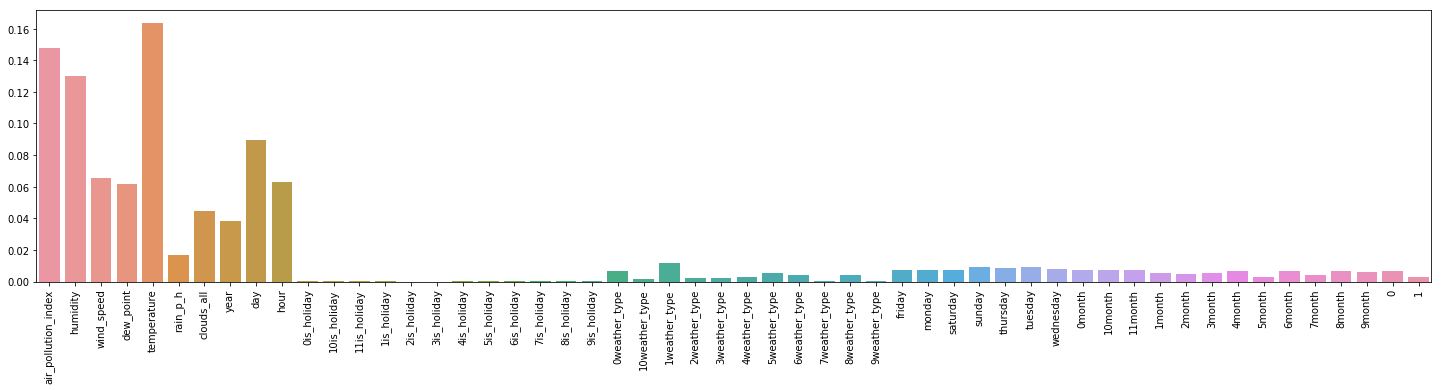

In [864]:
plt.figure(figsize=(25,5))
sns.barplot(x_train.columns,r1.feature_importances_)
plt.xticks(rotation=90)

In [351]:
r1=xgb.XGBRegressor()
params={"n_estimators":[200,250,300],"colsample_bytree":[0.75],"max_depth":[5,6,7,8],"learning_rate":[0.025,0.05,0.075],
         "colsample_bylevel":[0.75],"subsample":[1]}
gs1=GridSearchCV(estimator=r1,param_grid=params,cv=3).fit(x_train,np.log(y_train))
gs1.best_params_

{'colsample_bylevel': 0.75,
 'colsample_bytree': 0.75,
 'learning_rate': 0.075,
 'max_depth': 8,
 'n_estimators': 200,
 'subsample': 1}

In [353]:
r1=gs1.best_estimator_

In [354]:
evaluation(r1,x_train,x_test,np.log(y_train),np.log(y_test))

rmse for training set is 0.09949849808340407
rmse for test is 0.1709928354768293


In [0]:
# Random Forest

In [960]:
r2=RandomForestRegressor(n_estimators=800,max_features=0.5).fit(x_train,np.log(y_train))

In [961]:
evaluation(r2,x_train,x_test,np.log(y_train),np.log(y_test))

rmse for training set is 0.07734837050311136
rmse for test is 0.10685287051139508


In [358]:
r2=RandomForestRegressor()
params={"n_estimators":[500,600,800],"max_features":[0.5,0.75,0.85],"max_depth":[10,12,14,16]}
gs2=GridSearchCV(estimator=r2,param_grid=params,cv=3).fit(x_train,np.log(y_train))
gs2.best_params_

{'max_depth': 16, 'max_features': 0.5, 'n_estimators': 500}

In [0]:
# Gradient Boosting Regressor

In [908]:
r3=GradientBoostingRegressor(n_estimators=223,learning_rate=0.07,max_features=0.75,max_depth=6).fit(x_train,np.log(y_train))

In [909]:
evaluation(r3,x_train,x_test,np.log(y_train),np.log(y_test))

rmse for training set is 0.1521835934283502
rmse for test is 0.10185710816597071


212

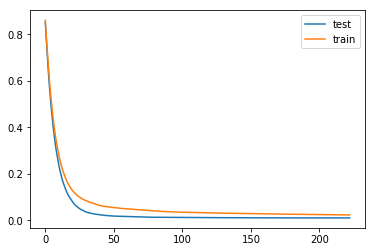

In [910]:
errors_test=[mean_squared_error(np.log(y_test),y_pred) for y_pred in r3.staged_predict(x_test)]
errors_train=[mean_squared_error(np.log(y_train),y_pred) for y_pred in r3.staged_predict(x_train)]
plt.plot(errors_test,label="test")
plt.plot(errors_train,label="train")
plt.legend()
np.argmin(errors_test)

In [355]:
r3=GradientBoostingRegressor()
params={"n_estimators":[100,200,300],"max_features":[0.75,0.85],"max_depth":[3,4,6,8],"learning_rate":[0.05,0.075,0.1]}
gs3=GridSearchCV(estimator=r3,param_grid=params,cv=3).fit(x_train,np.log(y_train))
gs3.best_params_

{'learning_rate': 0.05,
 'max_depth': 6,
 'max_features': 0.85,
 'n_estimators': 100}

In [356]:
r3=gs3.best_estimator_

In [357]:
evaluation(r3,x_train,x_test,np.log(y_train),np.log(y_test))

rmse for training set is 0.21178368160961078
rmse for test is 0.182534565634973


In [0]:
# adaboost regressor

In [932]:
base=DecisionTreeRegressor(max_depth=18,max_features=0.75)
r5=AdaBoostRegressor(base_estimator=base,n_estimators=300,learning_rate=0.04).fit(x_train,np.log(y_train))

In [933]:
evaluation(r5,x_train,x_test,np.log(y_train),np.log(y_test))

rmse for training set is 0.020745656951230644
rmse for test is 0.09801797921576116


In [92]:
base=DecisionTreeRegressor(max_depth=8,max_features=0.75)
r5=AdaBoostRegressor(base_estimator=base)
params={"n_estimators":[250,350,450],"learning_rate":[0.1,0.25,0.5]}
gs5=GridSearchCV(estimator=r5,param_grid=params,cv=3).fit(x_train,np.log(y_train))
gs5.best_params_

{'learning_rate': 0.1, 'n_estimators': 250}

In [93]:
gs5.best_params_

{'learning_rate': 0.1, 'n_estimators': 250}

In [94]:
r5=gs5.best_estimator_

In [85]:
evaluation(r5,x_train,x_test,np.log(y_train),np.log(y_test))

rmse for training set is 0.08039245887963926
rmse for test is 0.17839589834871364


In [0]:
# Model Stacking

In [964]:
## ensembling of models
def stacking(model_list,x_test3,y_test3):
    pred=[]
    for i in model_list:
        pred.append(i.predict(x_test3))
    p=pd.DataFrame(pred).T
    pred=pd.DataFrame(p.values,index=x_test3.index)
    pred['actual']=y_test3
    return pred

In [965]:
model_list=[r1,r2,r3,r5]
d=stacking(model_list,x_test,np.log(y_test))

In [966]:
## FITTING FINAL MODEL

x_t,x_d,y_t,y_d=train_test_split(d.drop(columns='actual'),d['actual'])

rf=LinearRegression().fit(x_t,(y_t))

np.sqrt(np.mean(np.square(np.log(y_t)-np.log(rf.predict(x_t)))))
print("rmse after ensembling of models is {}".format(np.sqrt(np.mean(np.square(np.log(y_d)-np.log(rf.predict(x_d)))))))

rmse after ensembling of models is 0.01078429543681453


In [967]:
## FINAL EVALUATION
def stacking_eval(model_list,x_test3):
    pred=[]
    for i in model_list:
        pred.append(i.predict(x_test3))
    p=pd.DataFrame(pred).T
    pred=pd.DataFrame(p.values,index=x_test3.index)
    return pred

In [968]:
final_evaluation=stacking_eval(model_list,test_final.drop(columns="date_time"))
result=rf.predict(final_evaluation)
result_final=np.exp(result)

In [970]:
result=pd.DataFrame({"date_time":test_idx,"traffic_volume":result_final})
result.set_index("date_time",inplace=True)
result.to_csv("C:/Users/User/Desktop/Comp/submission_4.csv")
result.head()

,traffic_volume
date_time,
2017-05-18 00:00:00,627.643297
2017-05-18 00:00:00,612.536359
2017-05-18 00:00:00,608.154124
2017-05-18 01:00:00,380.862678
2017-05-18 01:00:00,382.965295
